<img src='http://www-scf.usc.edu/~ghasemig/images/sharif.png' alt="SUT logo" width=300 height=300 align=left class="saturate" >

<br>
<font>
<div dir=ltr align=center>
<font color=0F5298 size=7>
    Artificial Intelligence <br>
<font color=2565AE size=5>
    Computer Engineering Department <br>
    Fall 2024<br>
<font color=3C99D size=5>
    Practical Assignment 1 - Search <br>
<font color=696880 size=4>
<div dir=ltr>
Dorsa Ghobadi



____

# Personal Data

In [1]:
# Set your student number
student_number = '401107613'
Name = 'Kimia'
Last_Name = 'Vanaei'

# Rules
- Make sure that all of your cells can be run perfectly.
-Do not change the Parts which are not marked with #TODO
-Complete the functions or parts that are marked with #TODO
-Feel free to add functions if you need!

## Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from queue import Queue, LifoQueue, PriorityQueue
import random


# Uninformed & Informed Search

<font size=4>
Author: Dorsa Ghobadi
			<br/>
                <font color=red>
Please run all the cells.
     </font>
</font>
                <br/>
    </div>

## Problem Definition

In This Problem, We want to investigate Maze Problem with the focus on implementing BFS,DFS and A-Star algorithm to solve it. This notebook is inspired by the [pacman](https://freepacman.org/) game. We generate a random maze and put the pacman in the top left crner and the food in the bottom right corner. The goal is to find a way from the pacman to the food using different search algorithms.



## Code

In [32]:
def generate_maze(rows, cols, wall_prob=0.3):
    np.random.seed(40)
    maze = np.random.choice([0, 1], size=(rows, cols), p=[1-wall_prob, wall_prob])
    start = (0, 0)
    goal = (rows-1, cols-1)
    maze[start] = 0
    maze[goal] = 0
    return maze, start, goal

def plot_maze(maze, path=None, start=None, goal=None):
    plt.imshow(maze, cmap="gray")
    if path:
        x, y = zip(*path)
        plt.plot(y, x, color='yellow', linewidth=2)  # Plot path in yellow
    if start:
        plt.scatter(start[1], start[0], color='blue', s=100, label='Pacman')  # Pacman start
    if goal:
        plt.scatter(goal[1], goal[0], color='green', s=100, label='Food')  # Food
    plt.legend()
    plt.show()

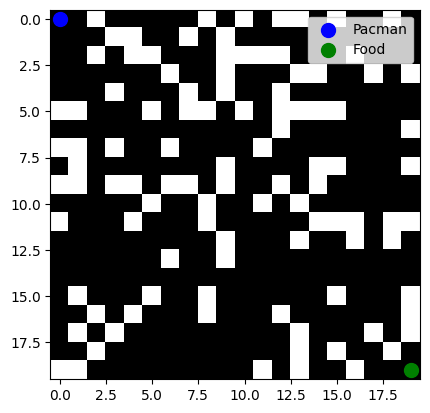

In [33]:
rows, cols = 20, 20
maze, start, goal = generate_maze(rows, cols)
plot_maze(maze, start=start, goal=goal)


In [34]:
class SearchAlgorithm:
    def __init__(self, maze):
        self.maze = maze
        self.rows, self.cols = maze.shape
        self.visited = np.zeros_like(maze)
        self.expanded_nodes = 0

    def get_neighbors(self, pos):
        neighbors = []
        directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]  # Right, Down, Left, Up
        for d in directions:
            new_pos = (pos[0] + d[0], pos[1] + d[1])
            if 0 <= new_pos[0] < self.rows and 0 <= new_pos[1] < self.cols and not self.maze[new_pos] and not self.visited[new_pos]:
                neighbors.append(new_pos)
        return neighbors


In [35]:
def plot_algorithm(maze, start, goal,name,algorithm):
  path = algorithm.search(start, goal)
  result = {'path': path, 'expanded_nodes': algorithm.expanded_nodes}
  print(f"{name}: Expanded Nodes = {algorithm.expanded_nodes}")
  plot_maze(maze, path, start, goal)



In [36]:
class DFS(SearchAlgorithm):
    def search(self, start, goal):
        stack = LifoQueue()
        stack.put((start, [start]))
        self.expanded_nodes = 0
        
        while not stack.empty():
            current_node, path = stack.get()
            if self.visited[current_node]:
                continue

            self.expanded_nodes += 1
            self.visited[current_node] = 1
            
            if current_node == goal:
                return path  

            for neighbor in self.get_neighbors(current_node):
                stack.put((neighbor, path + [neighbor]))  

        return path

DFS: Expanded Nodes = 261


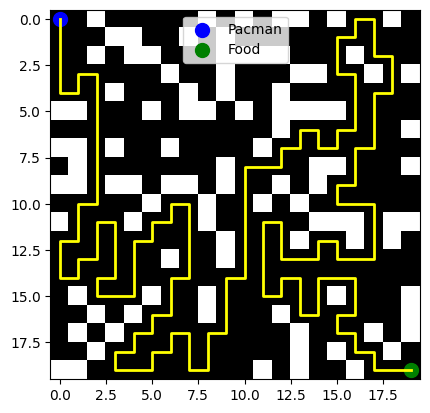

In [37]:
plot_algorithm(maze,start,goal,'DFS', DFS(maze))

In [38]:
class BFS(SearchAlgorithm):
    def search(self, start, goal):
        queue = Queue()  
        queue.put((start, [start]))  # (current_node, path_to_node)
        self.expanded_nodes = 0
        
        while not queue.empty():
            current_node, path = queue.get() 
            if self.visited[current_node]:
                continue

            self.visited[current_node] = 1
            self.expanded_nodes += 1   
            
            if current_node == goal:
                return path  
            
            for neighbor in self.get_neighbors(current_node):
                queue.put((neighbor, path + [neighbor])) 
        
        return path

BFS: Expanded Nodes = 280


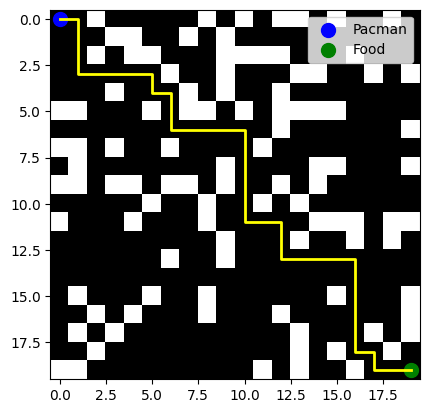

In [39]:
plot_algorithm(maze,start,goal,'BFS', BFS(maze))

Question:

So far, we have explored three uninformed search methods: DFS, BFS. Briefly explain the advantages and disadvantages of each method in the context of the Maze Problem and compare their performance based on your observations (consider both time and memory).

Answer : DFS requires less memory than BFS, because it only keeps track of the nodes along the current path + any siblings that are yet to be explored. If the solution to the maze is deep within the search tree, DFS may reach the goal faster since it explores deeper nodes first. DFS does not guarantee the shortest path to the goal, because it may get stuck in a loop.
BFS is optimal for finding the shortest path in an unweighted maze, because it explores all nodes at the current level before moving to the next level. BFS requires more memory than DFS because it stores all the nodes at the current level. BFS is guaranteed to find the shortest path but it can take a long time to answer in large mazes, especially when the goal is far from the start.
In this problem, we observed that BFS found the shorter path but expanded more nodes. DFS's path is longer but it expanded less nodes.

In [40]:
class AStar(SearchAlgorithm):
    def heuristic(self, pos, goal):
        # manhattan distance
        return abs(pos[0] - goal[0]) + abs(pos[1] - goal[1])

    def search(self, start, goal):
        p_queue = PriorityQueue()
        p_queue.put((0, start, [start]))  # (f_value, start_node, path)

        # cost from start to each node
        g_value = {start: 0}

        self.expanded_nodes = 0
        
        while not p_queue.empty():
            current_f, current_node, path = p_queue.get()  # get the node with lowest f_value
            if self.visited[current_node]:
                continue

            self.expanded_nodes += 1
            self.visited[current_node] = 1
            
            if current_node == goal:
                return path  
            
            for neighbor in self.get_neighbors(current_node):                
                g_value[neighbor] = g_value[current_node] + 1
                f_value = g_value[neighbor] + self.heuristic(neighbor, goal)  # f(n)=g(n)+h(n)
                p_queue.put((f_value, neighbor, path + [neighbor]))  
        
        return path

A*: Expanded Nodes = 169


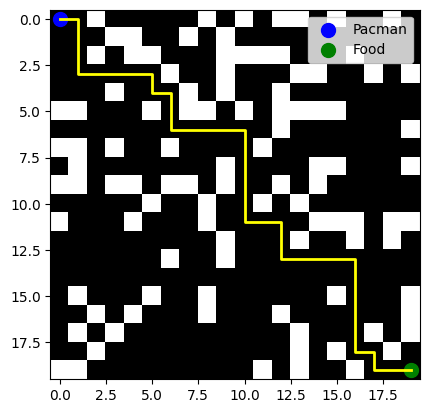

In [41]:
plot_algorithm(maze,start,goal,'A*', AStar(maze))

Question:

Explain your heuristic and observation's result. Also, compare the A* method with Uniformed search in the context of the Maze problem.

Answer: In this problem which is a maze, we used Manhattan distance as our heuristic function which is admissible. As the output shows, it explored less nodes than the uninformed methods. A* is more efficient than BFS and DFS because it uses a heuristic to focus the search towards the goal. It guarantees the shortest path when using an admissible and monotonic heuristic.
For the maze problem, the A* algorithm is the better solution because it balances time and memory complexity and guarantees an optimal solution if the heuristic is admissible and monotonic.

Now we want to explore a situation where each cell of the maze has an entrance cost, which means in order to enter that cell we must pay a fixed price. you should implement the above search algorithms with the least payed cost.

In [42]:
def generate_maze_with_costs(rows, cols, wall_prob=0.3):
    np.random.seed(137)
    maze = np.random.choice([0, 1], size=(rows, cols), p=[1-wall_prob, wall_prob])
    costs = np.random.randint(1, 11, size=(rows, cols))
    start = (0, 0)
    goal = (rows-1, cols-1)
    maze[start] = 0
    maze[goal] = 0
    return maze, costs, start, goal

def plot_maze_with_costs(maze, costs, path=None, start=None, goal=None):
    plt.imshow(maze, cmap="gray", vmin=0, vmax=1)

    for i in range(maze.shape[0]):
        for j in range(maze.shape[1]):
            if maze[i, j] == 0:
                cl = 'red' if costs[i,j] > 6 else ('green' if costs[i,j] < 4 else 'orange')
                plt.text(j, i, str(costs[i, j]), ha='center', va='center', color=cl, fontsize=8)

    if path:
        x, y = zip(*path)
        plt.plot(y, x, color='yellow', linewidth=2)  # Plot path in yellow
    if start:
        plt.scatter(start[1], start[0], color='blue', s=100, label='Pacman')  # Pacman start
    if goal:
        plt.scatter(goal[1], goal[0], color='pink', s=100, label='Food')  # Food
    plt.legend()
    plt.show()


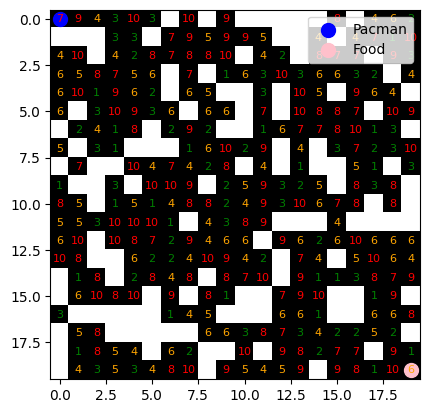

In [43]:
rows, cols = 20, 20
maze, costs, start, goal = generate_maze_with_costs(rows, cols)
plot_maze_with_costs(maze, costs, start=start, goal=goal)

In [44]:
# Search Algorithms
class SearchAlgorithmWithCosts:
    def __init__(self, maze, costs):
        self.maze = maze
        self.costs = costs
        self.rows, self.cols = maze.shape
        self.visited = np.zeros_like(maze)
        self.expanded_nodes = 0

    def get_neighbors(self, pos):
        neighbors = []
        directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]  # Right, Down, Left, Up
        for d in directions:
            new_pos = (pos[0] + d[0], pos[1] + d[1])
            if 0 <= new_pos[0] < self.rows and 0 <= new_pos[1] < self.cols and not self.maze[new_pos] and not self.visited[new_pos]:
                neighbors.append(new_pos)
        return neighbors

    def calculate_total_cost(self, path):
        return sum(self.costs[pos] for pos in path)



In [45]:
def plot_algorithms_with_costs(maze, costs, start, goal,name,algorithm):
    path, total_cost = algorithm.search(start, goal)
    result = {'path': path, 'expanded_nodes': algorithm.expanded_nodes, 'total_cost': total_cost}
    print(f"{name}: Expanded Nodes = {algorithm.expanded_nodes}, Total Cost = {total_cost}")
    plot_maze_with_costs(maze, costs, path, start, goal)


In [46]:
class DFSWithCosts(SearchAlgorithmWithCosts):
    def search(self, start, goal):
        stack = LifoQueue()
        stack.put((start, [start], self.costs[start]))
        best_cost = float('inf') 
        best_path = None
        self.expanded_nodes = 0
        
        while not stack.empty():
            current_node, path, curr_cost = stack.get() 
            if self.visited[current_node]:
                continue

            self.expanded_nodes += 1 
            self.visited[current_node] = 1
            
            if current_node == goal:
                best_cost = curr_cost
                best_path = path
                return best_path, best_cost

            for neighbor in self.get_neighbors(current_node):
                new_cost = curr_cost + self.costs[neighbor]
                stack.put((neighbor, path + [neighbor], new_cost)) 
        
        return best_path, best_cost

DFS: Expanded Nodes = 257, Total Cost = 930


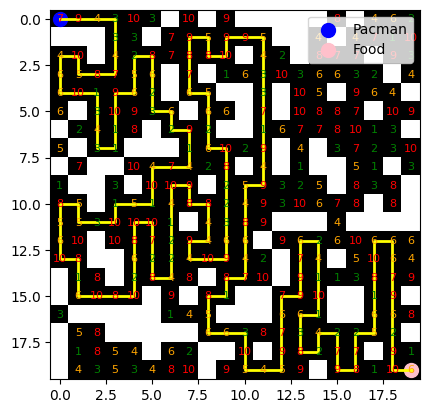

In [47]:
plot_algorithms_with_costs(maze, costs, start, goal,'DFS',DFSWithCosts(maze,costs))

In [48]:
class BFSWithCosts(SearchAlgorithmWithCosts):
    def search(self, start, goal):
        queue = Queue()
        queue.put((start, [start], self.costs[start]))  
        self.expanded_nodes = 0
        best_cost = float('inf')  
        best_path = None
        
        while not queue.empty():
            current_node, path, current_cost = queue.get()  
            if self.visited[current_node]:
                continue

            self.expanded_nodes += 1
            self.visited[current_node] = 1
            
            if current_node == goal:
                best_cost = current_cost
                best_path = path
                return best_path, best_cost
            
            for neighbor in self.get_neighbors(current_node):
                new_cost = current_cost + self.costs[neighbor]  
                queue.put((neighbor, path + [neighbor], new_cost))  
        
        return best_path, best_cost

BFS: Expanded Nodes = 267, Total Cost = 232


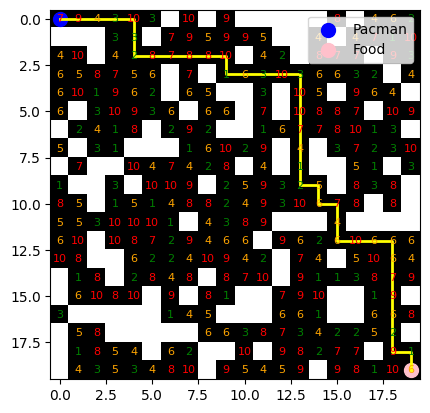

In [49]:
plot_algorithms_with_costs(maze, costs, start, goal,'BFS',BFSWithCosts(maze,costs))

In [50]:
class AStarWithCosts(SearchAlgorithmWithCosts):
    def heuristic(self, pos, goal):
        # manhattan distance
        return abs(pos[0] - goal[0]) + abs(pos[1] - goal[1])

    def search(self, start, goal):
        # (f_value, current_node, path, g_value)
        p_queue = PriorityQueue()
        p_queue.put((0 + self.heuristic(start, goal), start, [start], self.costs[start]))

        g_value = {start: self.costs[start]} 
        self.expanded_nodes = 0
        best_cost = float('inf')
        best_path = None

        while not p_queue.empty():
            # get the node with the lowest f_value
            f_value, current_node, path, current_g_value = p_queue.get()
            if self.visited[current_node]:
                continue
            
            self.expanded_nodes += 1
            self.visited[current_node] = 1

            if current_node == goal:
                best_cost = current_g_value
                best_path = path
                return best_path, best_cost

            for neighbor in self.get_neighbors(current_node):
                g_value[neighbor] = current_g_value + self.costs[neighbor]  # cost to reach neighbor
                f_score = g_value[neighbor] + self.heuristic(neighbor, goal)  # f = g + h
                p_queue.put((f_score, neighbor, path + [neighbor], g_value[neighbor]))

        return best_path, best_cost

A*: Expanded Nodes = 267, Total Cost = 177


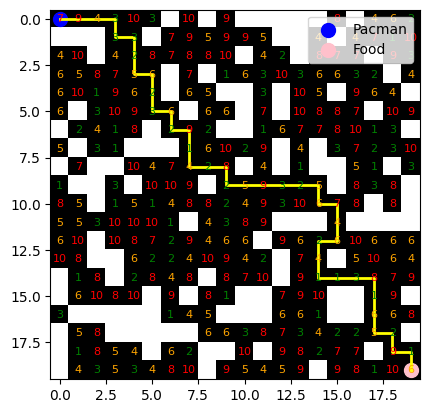

In [51]:
plot_algorithms_with_costs(maze, costs, start, goal,'A*',AStarWithCosts(maze,costs))

Question:

now that you have explored these methods(DFS, BFS,A star) in priced manner, Briefly explain the advantages and disadvantages of each method in the context of the Maze Problem and compare their performance based on your observations.

Answer: The most efficient algorithm for the maze problem is A*, since it uses a heuristic to focus on the goal. It is surely efficient when we have an admissible and monotonic heuristic. DFS is memory efficient and its memory complexity is less than the other two, but it is not complete since it may get stuck in loop. BFS is complete and it returns the shortest path if we have a uniform cost problem, but it stores all the nodes at each level and it is not memory efficient.